<a href="https://colab.research.google.com/github/chitreshkr/AI-Workshop/blob/master/Day1_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step1 Getting the data

In [0]:
 import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [10]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
mnist.validation.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
mnist.train.num_examples

55000

In [13]:
mnist.test.num_examples

10000

# Step 2 Visualizing the Data

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
mnist.train.images.shape

(55000, 784)

In [18]:
mnist.train.images[500]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
my_img = mnist.train.images[500].reshape(28,28)

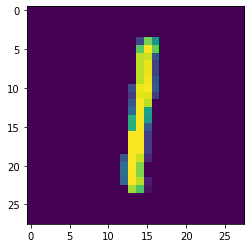

In [21]:
plt.imshow(my_img)

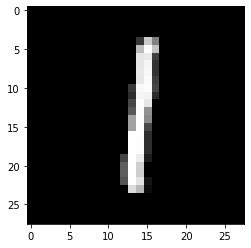

In [22]:
plt.imshow(my_img, cmap='gist_gray')

In [23]:
my_img.min()

0.0

In [24]:
my_img.max()

1.0

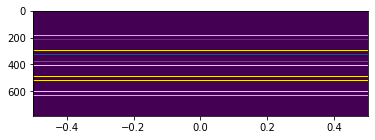

In [30]:
my_img2 = mnist.train.images[500].reshape(784,1)
plt.imshow(my_img2,aspect=0.0004)

# Step3 - Building my first NN Model

1.   Placeholders
2.   Variables
3. Create our computation graph
4. Loss Functions
5. Optimizer
6. Create and run the session



In [0]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [0]:
# Weights and bias
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [0]:
# Create my computation graph
y = tf.matmul(x,W) + b

In [0]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits = y))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

In [0]:
train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

# Create and Run the session

In [0]:
with tf.Session() as sess:
  sess.run(init)

  #Train 10000
  for step in range(10000):
    batch_x,batch_y = mnist.train.next_batch(100)
    sess.run(train,feed_dict = {x : batch_x ,y_true : batch_y})

    #Evaluate the test/train model

    matches = tf.equal(tf.arg_max(y,1),tf.arg_max(y_true,1))

    accuracy = tf.reduce_mean(tf.cast(matches,tf.float32))

    print(sess.run(accuracy,feed_dict = {x : mnist.test.images,
                                         y_true : mnist.test.labels}))
        
print("Epoch : {} cost {: .4f}".format(epoch+1,avg_cost))
print("Model has completed {} Epochs of training".format (training_epochs))

0.4914
0.5565
0.5711
0.597
0.6069
0.6095
0.6303
0.6689
0.6864
0.7037
0.7137
0.7157
0.7164
0.7188
0.7204
0.7226
0.7253
0.7286
0.733
0.7382
0.7417
0.7441
0.7497
0.7525
0.7561
0.7623
0.7702
0.772
0.776
0.7814
0.7853
0.7898
0.7928
0.7959
0.7986
0.8002
0.8011
0.801
0.8021
0.8031
0.8038
0.8059
0.8063
0.8076
0.808
0.8097
0.81
0.8129
0.8155
0.8173
0.8198
0.8203
0.8213
0.8229
0.8236
0.824
0.8253
0.827
0.8275
0.8287
0.8294
0.8317
0.8329
0.8338
0.8347
0.8363
0.8368
0.8379
0.8393
0.84
0.8404
0.841
0.8414
0.841
0.8405
0.8395
0.8387
0.8368
0.8362
0.8368
0.837
0.8373
0.8369
0.8372
0.8377
0.8381
0.8384
0.8392
0.8393
0.84
0.8405
0.8424
0.844
0.8465
0.8487
0.85
0.851
0.8524
0.8531
0.8526
0.8534
0.8538
0.8542
0.854
0.8541
0.8544
0.8564
0.857
0.8567
0.8564
0.8564
0.8578
0.8588
0.8594
0.8599
0.8604
0.8607
0.8607
0.8612
0.8617
0.8624
0.8631
0.8635
0.864
0.8643
0.8648
0.8649
0.8648
0.8663
0.8663
0.8663
0.8663
0.8668
0.8662
0.8662
0.8659
0.8655
0.8646
0.8638
0.8635
0.8627
0.8635
0.8639
0.8641
0.8641
0.8643
0.